In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv("/Users/zahiramohammed/Desktop/diabetes_final.csv")
data.head(5)

,Unnamed: 0,Gender,Age,Hyper_Tension,Heart_Disease,Smoking_History,BMI,Blood_Glucose_Level,HbA1c_levels,Diabetes
0,0,1.0,1,0,0,-1.0,-1.260878,2,0,0
1,1,1.0,1,0,0,0.0,-0.714235,0,0,0
2,2,1.0,1,0,0,0.0,0.081313,2,1,0
3,3,1.0,2,0,0,-2.0,0.553915,2,1,0
4,4,0.0,1,0,0,2.0,0.807545,1,2,0


In [3]:
dependent_var = 'Diabetes'
continuous_vars = ['Age', 'BMI','Blood_Glucose_Level','HbA1c_levels' ]
ordinal_var = ['Gender','Hyper_Tension','Heart_Disease','Smoking_History']

In [4]:
# Splitting the dataset into the Training set and Test set
X = data[continuous_vars + ordinal_var]
y = data[dependent_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)


In [5]:
# Create logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [6]:
# Predicting the Test set results
y_pred = model.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

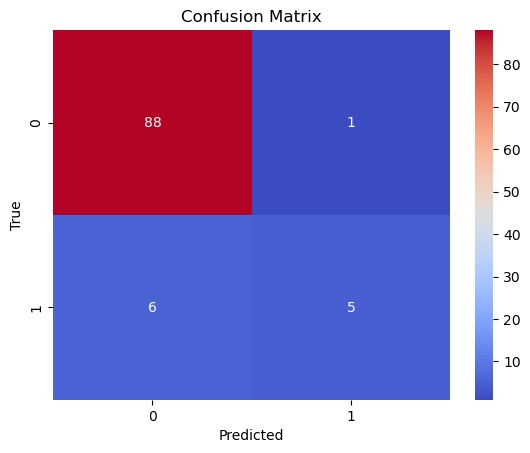

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        89
           1       0.83      0.45      0.59        11

    accuracy                           0.93       100
   macro avg       0.88      0.72      0.77       100
weighted avg       0.92      0.93      0.92       100



In [7]:
# Visualising the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

In [8]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.93


In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

intercept = model.intercept_[0]
print("Intercept (beta_0):", intercept)
coefficients = model.coef_[0]
print("Coefficients (beta_1, beta_2, ..., beta_n):", coefficients)

Intercept (beta_0): -7.3056424283845836
Coefficients (beta_1, beta_2, ..., beta_n): [ 0.62834958  0.44338665  1.65463747  0.98976563 -0.32299053  0.85642701
  0.95238481 -0.20524739]


In [10]:
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

In [12]:
# Make predictions  
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# ROC Curve 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
print("AUC Score:", roc_auc_score(y_test, y_prob))

AUC Score: 0.9279877425944841


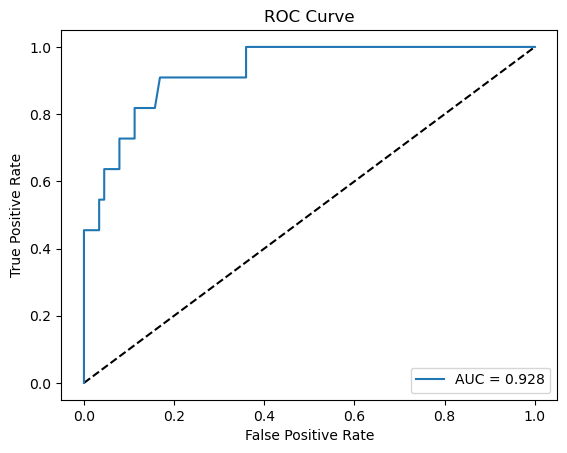

In [13]:
# Calculate AUC score
auc = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC = {0:.3f}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [20]:
new_data = [[0,2,0,1,0,-0.780009,1,3]]  # Replace with your new data
prediction = model.predict(new_data)
print(f"Prediction for new data: {prediction[0]}")

Prediction for new data: 0


/Users/zahiramohammed/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.084
R^2 Score: 0.2266902342023862


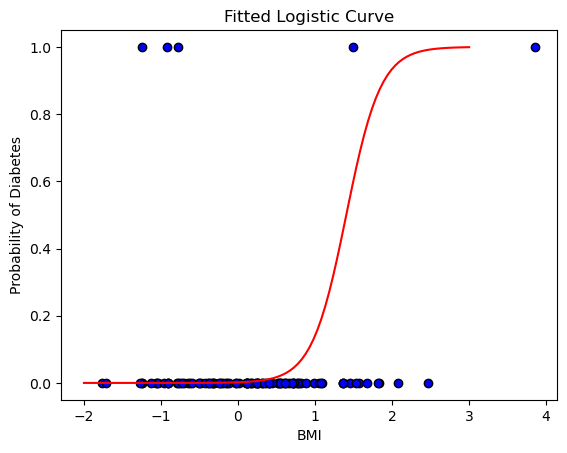

In [22]:
#dimension for coefficients
intercept = model.intercept_[0]
coefficients = np.array([ 0.56486099,  0.14547928 , 1.76454931  ,0.92769589 ,-0.14571308  ,0.67776541,
  0.74144216, -0.20814621])
# Function for prediction  
def logistic_func(x, coefficients, intercept):
    z = np.sum(coefficients * x, axis=1) + intercept 
    return 1 / (1 + np.exp(-z))


# Generate sample data
np.random.seed(42)
X = np.random.normal(size=(100,8))
y_prob = logistic_func(X, coefficients, intercept)
y = np.random.binomial(1, y_prob) 

# Fit logistic curve
xfit = np.linspace(-2,3,100)
yfit = logistic_func(xfit[:,np.newaxis], coefficients, intercept)

# Plot curve
plt.plot(xfit, yfit, c='red')
plt.scatter(X[:,1], y, edgecolor='k', c='blue')  
plt.xlabel('BMI')
plt.ylabel('Probability of Diabetes')

plt.title('Fitted Logistic Curve')
plt.show()